## Decision Tree 


### Advantages of Decision Tree
    1.Decision trees can be used to predict both continuous and discrete values i.e. they work well for both regression and  
      classification tasks.
    2.They require relatively less effort for training the algorithm.
    3.They can be used to classify non-linearly separable data.
    4.They're very fast and efficient compared to KNN and other classification algorithms.

### Dataset
The dataset for this task can be downloaded from this link:

https://drive.google.com/open?id=13nw-uRXPY8XIZQxKRNZ3yYlho-CYm_Qt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dataset = pd.read_csv("bill_authentication.csv")
dataset.head(10)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


### Data Analysis

In [6]:
dataset.shape

(1372, 5)

In [7]:
dataset.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Preparing the Data

In [8]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

### splitting the given data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Training and Making Predictions

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Evaluating the Algorithm

In [19]:
classifier.score(X_test,y_test)

0.9854545454545455

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[146   3]
 [  1 125]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       149
           1       0.98      0.99      0.98       126

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [14]:
cm=confusion_matrix(y_test, y_pred)

Text(69.0, 0.5, 'true values')

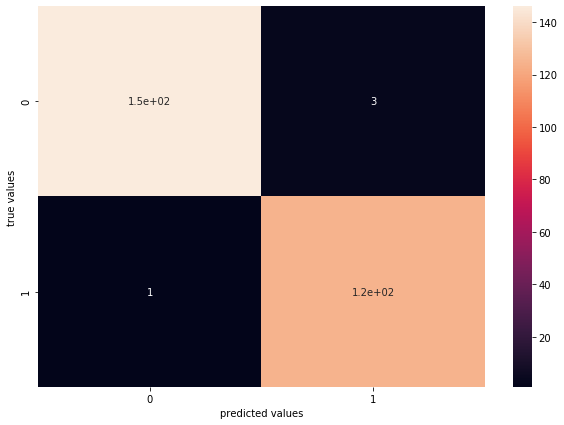

In [16]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted values")
plt.ylabel("true values")

In [2]:
a={"company":["google","google","google","google","google","google","abc pharma","abc pharma","abc pharma","abc pharma","facebook","facebook","facebook","facebook","facebook","facebook"],
   "job":["sales exe","sales exe","business manager","business manager","computer programmer","computer programmer","sales exe","computer programmer",
         "business manager","business manager","sales exe","sales exe","business manager","business manager","computer programmer","computer programmer"] ,
   "degree":["bachelors","masters","bachelors","masters","bachelors","masters","masters","bachelors","bachelors","masters","bachelors","masters","bachelors","masters","bachelors","masters",],
   "salary > 100k":[0,0,1,1,0,1,0,0,0,1,1,1,1,1,1,1]
}
df=pd.DataFrame(a)
df

,company,job,degree,salary > 100k
0,google,sales exe,bachelors,0
1,google,sales exe,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales exe,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [3]:
inputs=df.drop("salary > 100k",axis="columns")
inputs

,company,job,degree
0,google,sales exe,bachelors
1,google,sales exe,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales exe,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [4]:
target=df["salary > 100k"]
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary > 100k, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [6]:
inputs["company_n"]=le_company.fit_transform(inputs["company"])
inputs["job_n"]=le_job.fit_transform(inputs["job"])
inputs["degree_n"]=le_degree.fit_transform(inputs["degree"])
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales exe,bachelors,2,2,0
1,google,sales exe,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales exe,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [7]:
x=inputs.drop(["company","job","degree"],axis="columns")
x

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,target,test_size=.2)

In [9]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
model.predict(x_test)

array([0, 1, 1, 0], dtype=int64)

In [11]:
model.score(x_test,y_test)

0.75

In [14]:
model.predict([[1,0,0]])

array([1], dtype=int64)